# Imputation example 1

In [1]:
import pandas as pd
pd.set_option('max_columns', None)
df = pd.read_csv("D:\\Data Science\\Dataset\\beer-recipes\\recipeData.csv", encoding = 'latin-1').set_index("BeerID")

In [2]:
df.head()

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
BeerID,,,,,,,,,,,,,,,,,,,,,,
1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [3]:
df.shape

(73861, 22)

In [4]:
df.describe()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp,UserId
count,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,70871.000000,73861.000000,43997.000000,34609.000000,51199.000000,23371.000000
mean,60.179432,43.929775,1.406266,1.075865,6.136865,44.276186,13.404989,49.724919,65.074870,1.353955,66.354881,2.127235,0.750468,19.175641,43078.069188
std,56.811462,180.373492,2.196908,0.432524,1.883510,42.945508,11.944511,193.246427,15.024228,1.930989,14.091686,1.682347,0.394262,4.219676,27734.252556
min,1.000000,1.000000,1.000000,-0.003000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.780000,49.000000
25%,10.000000,18.930000,1.051000,1.011000,5.080000,23.370000,5.170000,20.820000,60.000000,1.040000,65.000000,1.500000,0.350000,18.000000,20984.000000
50%,35.000000,20.820000,1.058000,1.013000,5.790000,35.770000,8.440000,27.440000,60.000000,1.047000,70.000000,1.500000,0.750000,20.000000,42897.000000
75%,111.000000,23.660000,1.069000,1.017000,6.830000,56.380000,16.790000,30.000000,60.000000,1.060000,75.000000,3.000000,1.000000,20.000000,57841.000000
max,176.000000,9200.000000,34.034500,23.424600,54.720000,3409.300000,186.000000,9700.000000,240.000000,52.600000,100.000000,100.000000,2.000000,114.000000,134362.000000


In [5]:
df.isnull().sum()

Name                 1
URL                  0
Style              596
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2990
Efficiency           0
MashThickness    29864
SugarScale           0
BrewMethod           0
PitchRate        39252
PrimaryTemp      22662
PrimingMethod    67095
PrimingAmount    69085
UserId           50490
dtype: int64

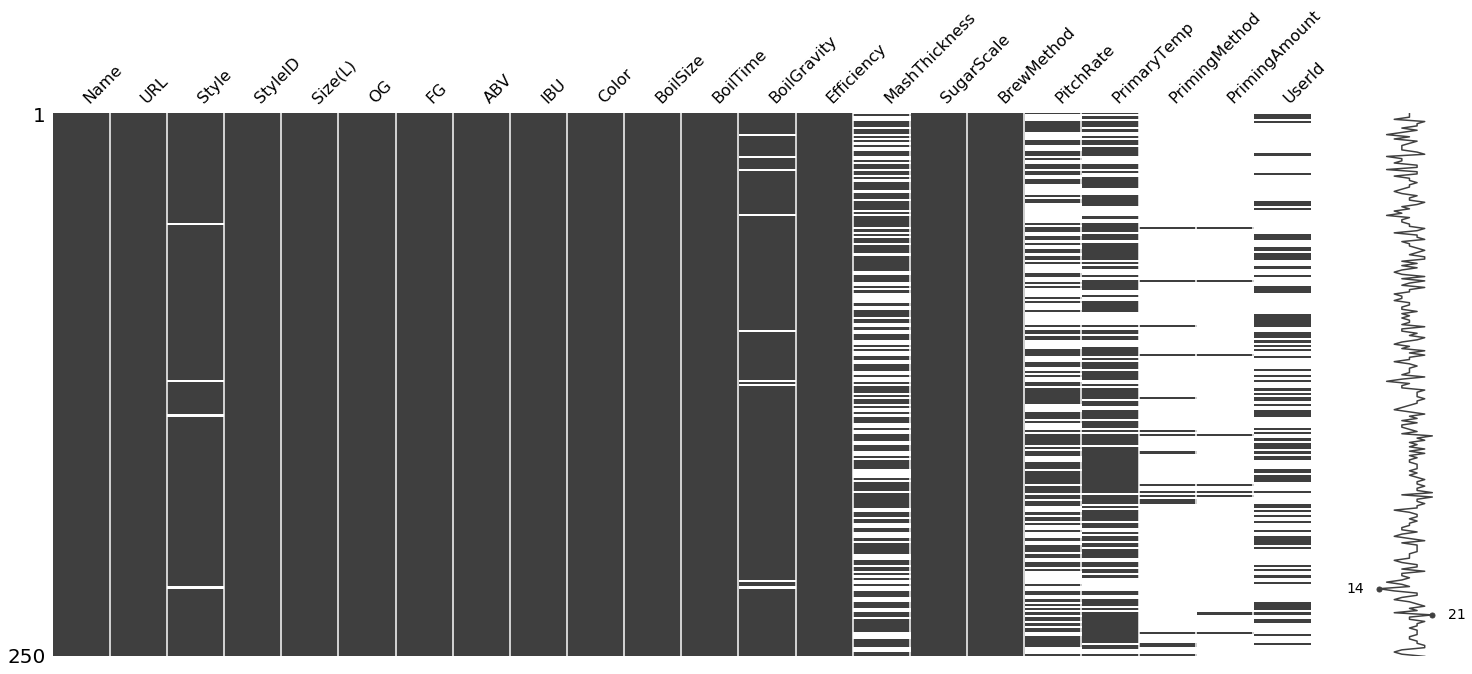

In [6]:
import missingno as msno
%matplotlib inline
msno.matrix(df.sample(250))

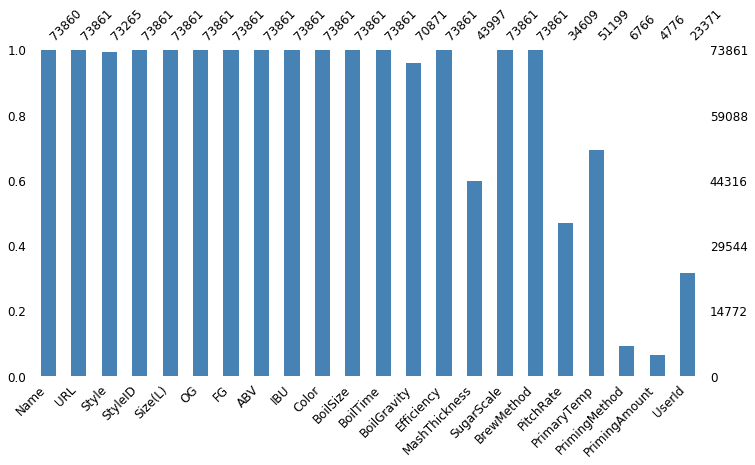

In [8]:
# Visualizing the patterns of missing value occurrence with Python

import missingno as msno
import matplotlib.pyplot as plt


msno.bar(df, figsize=(12,6), fontsize=12, color='steelblue')

In [9]:
# Data missing at random and not at random

len(df), len(df.dropna())

(73861, 757)

NameError: name 'X_sample' is not defined

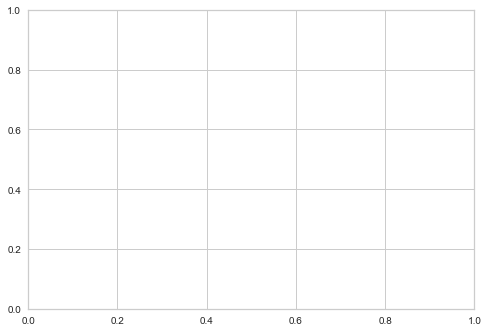

In [13]:
# # Dropping features with high nullity
# # Here's a short recipe for a variable importance check:
# ___________________________________________________________________
# from sklearn.tree import DecisionTreeClassifier
# from yellowbrick.features import FeatureImportances

# clf = DecisionTreeClassifier()
# viz = FeatureImportances(clf)
# viz.fit(X_sample, y_sample)
# viz.poof()

In [14]:
df.shape[1],df.drop(['PrimingMethod', 'PrimingAmount'], axis= 'columns').shape[1]

(22, 20)

In [17]:
# Mean or median or other summary statistic substitution

df['MashThickness'].isnull().sum(), df['MashThickness'].fillna(df['MashThickness'].mean()).isnull().sum()

(29864, 0)

In [18]:
df['MashThickness'].mean(), df['MashThickness'].fillna(df['MashThickness'].mean()).mean()

(2.1272352339932605, 2.127235233992244)

In [19]:
# Model imputation
# Format the data for applying ML to it.

popular_beer_styles = (pd.get_dummies(df['Style']).sum(axis='rows') > (len(df) / 100)).where(lambda v: v).dropna().index.values

dfc = (df
       .drop(['PrimingMethod', 'PrimingAmount', 'UserId', 'PitchRate', 'PrimaryTemp', 'StyleID', 'Name', 'URL'], axis='columns')
       .dropna(subset=['BoilGravity'])
       .pipe(lambda df: df.join(pd.get_dummies(df['BrewMethod'], prefix='BrewMethod')))
       .pipe(lambda df: df.join(pd.get_dummies(df['SugarScale'], prefix='SugarScale')))       
       .pipe(lambda df: df.assign(Style=df['Style'].map(lambda s: s if s in popular_beer_styles else 'Other')))
       .pipe(lambda df: df.join(pd.get_dummies(df['Style'], prefix='Style')))       
       .drop(['BrewMethod', 'SugarScale', 'Style'], axis='columns')
      )

c = [c for c in dfc.columns if c != 'MashThickness']
X = dfc[dfc['MashThickness'].notnull()].loc[:, c].values
y = dfc[dfc['MashThickness'].notnull()]['MashThickness'].values
yy = dfc[dfc['MashThickness'].isnull()]['MashThickness'].values

In [29]:
# popular_beer_styles
# dfc
# c
# X
# yy

array([nan, nan, nan, ..., nan, nan, nan])

In [20]:
# Apply a regression approach to imputing the mash thickness.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

import numpy as np
np.random.seed(42)
kf = KFold(n_splits=4)
scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    
    scores.append(r2_score(y_test, y_test_pred))

print(scores)

[0.01294253339326612, 0.009359944248067742, 0.00924054218885928, -0.00039579117668386843]


In [24]:
# Multiple imputation

from fancyimpute import MICE

trans = MICE()
trans.complete

ModuleNotFoundError: No module named 'fancyimpute'

In [22]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Create a sample point cloud.
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.05, 0.10, 0.85],
                           class_sep=2, random_state=0)

# Select indices to drop labels from.
X_l = X.shape[0]
np.random.seed(42)
unl_idx = np.random.randint(0, len(X), size=X_l - 500)

# Back the labels up and drop them.
y = y.astype('float64')
X_train, y_train = X[unl_idx].copy(), y[unl_idx].copy()
X[unl_idx] = np.nan
y[unl_idx] = np.nan

# The fancyimpute package takes a single combined matrix as input. It differs in this from the X feature matrix, y response vector style of sklearn.
f = np.hstack((X, y[:, None]))

# Impute the missing values.
from fancyimpute import MICE
trans = MICE(verbose=False)
f_complete = trans.complete(f)

ModuleNotFoundError: No module named 'fancyimpute'

In [ ]:
(f_complete == np.nan).any()